In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from random import randint

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [4]:
x_train, x_test = x_train/255.0, x_test/255.0

In [5]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [6]:
latent_dim = 64

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(latent_dim, activation='relu'),
    tf.keras.layers.Dense(784, activation='sigmoid'),
    tf.keras.layers.Reshape(target_shape=(28,28))
])

In [8]:
model(x_train[:1]).shape

TensorShape([1, 28, 28])

In [9]:
loss = tf.keras.losses.MeanSquaredError()

In [10]:
model.compile(loss=loss, optimizer='adam')

In [11]:
model.fit(x_train, x_train, epochs=10, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0238 - val_loss: 0.0130
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0115 - val_loss: 0.0105
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0100 - val_loss: 0.0097
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0094 - val_loss: 0.0093
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0091 - val_loss: 0.0091
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0090 - val_loss: 0.0090
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0089 - val_loss: 0.0090
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0088 - val_loss: 0.0089
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0088 - val_loss: 0.0089
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.008

In [38]:
i = randint(0,len(x_test))
print(i)

8355


Text(0.5, 1.0, 'Original')

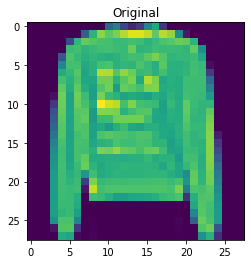

In [39]:
plt.imshow(x_test[i])
plt.title('Original')

Text(0.5, 1.0, 'Reconstructed')

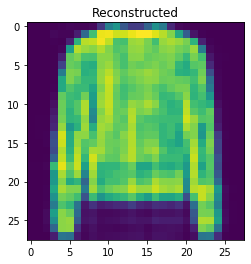

In [50]:
prediction = model(x_test[i].reshape(1,28,28))
plt.imshow(prediction[0])
plt.title('Reconstructed')